# FitzHugh-Nagumo Model
Code solves FitzHugh-Naugmo for given parameters and given inital conditon $u$ and $v$ + another excitation $u_2$ after some time.

Currently conditions choosen in such a way that 2 spiral waves are created.

In [1]:
from projectlib2 import *

## Parameters

In [2]:
# Systemparamters
epsilon = 0.01 #time scale seperation ~ refractory period
a = 3          #excitation duration
b = 0.2        #from excitation threshhold b
D = 1          #Diffusitivity

# Grid
N = 200
L = 400

# Time
t_end = 600

## Functions FitzHugh-Nagumo

In [3]:
def fitzhugh_nagumo_du(u, v): #excitation (membrane voltage)
    return (a*u*(u-b)*(1-u) - v + D*convolve(u, laplace(N, L), mode="reflect"))

def fitzhugh_nagumo_dv(u, v): #refractory
    return epsilon*(u-v)

## Start Conditions

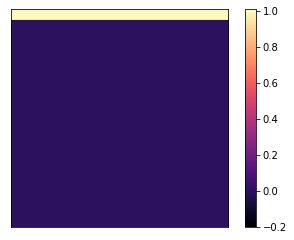

In [4]:
# for wave front
x = np.linspace(-L / 2, L / 2, N, endpoint=False)
X, Y = np.meshgrid(x, x)
u = np.zeros((N,N))
v = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        if (i<N/20):
                u[i][j] = 1

fig, ax=plt.subplots()
ax.set_yticks([])
ax.set_xticks([])

plt.imshow(u, vmin=-0.2, vmax=1.01, cmap="magma")
plt.colorbar()
plt.show() 

In [5]:
# second excitation - pick one and enter def. in next cell
# (i>35) and (i<45) for hitting only refractory        -> 2nd excitation dies out
# (i>25) and (i<35) for hitting vunerable period       -> 2 spiral waves
# (i>15) and (i<25) for not hitting vunerable period   -> concentric wave
# (i<N/4)           for simple block and hitting vunerable period -> 2 spiral waves

In [16]:
width = N/5

x = np.linspace(-L / 2, L / 2, N, endpoint=False)
X, Y = np.meshgrid(x, x)
u2 = np.zeros((N,N))
v2 = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        if (i>25) and (i<35) :                       # enter def. here 
            if (j>N/2 - width) and (j<N/2 + width):
                u2[i][j] = 1

fig, ax=plt.subplots()
ax.set_yticks([])
ax.set_xticks([])


plt.imshow(u2, vmin=-0.2, vmax=1.0, cmap="magma")
plt.colorbar()
plt.show()

### Solve System and cause spirals

In [17]:
def solve_system_add_spiral(func_du, func_dv, u_start, v_start,  t_end, t_excit,dt=1e-2, output_steps=50):
    U = []           # output
    V = []   
    
    u = u_start      # N*N Matrix with startvalues for excitation
    v = v_start
    
    t = 0
    t_output = np.linspace(0, t_end, output_steps)
    for t_next in t_output:
        while t < t_next:
            if (t > t_excit ) and (t<t_excit+5):
                u += u2
            u = u + dt * func_du(u, v)
            v = v + dt * func_dv(u, v)
            t += dt
        U.append(u)
        V.append(v)
    return U, V


In [18]:
t_excit = 175
output_steps = 50
dt = 1e-2
U, V = solve_system_add_spiral(fitzhugh_nagumo_du, fitzhugh_nagumo_dv, u, v, t_end, t_excit, dt, output_steps)

np.save("FHN_2spirals_u", U)
np.save("FHN_2spirals_v", V)

### Animate Solution

In [19]:
def plot_state(i):
    return plt.imshow(U[i].reshape(N, N),vmin=-0.2, vmax=1.01,  cmap="magma")


In [20]:
# Plot one specific frame 
time  = 175                           # time at which frame should be plotted          
frame = int(np.ceil(time*output_steps/t_end))  # frame wich should be plotted 

fig, ax=plt.subplots()
ax.set_yticks([])
ax.set_xticks([])
plot_state(frame)
plt.colorbar()
plt.show()

print(f"plot frame {frame} at time {dt*frame}")

plot frame 15 at time 0.15


In [21]:
frame_setting=output_steps
interval_setting=10000/frame_setting
ani1 = animation.FuncAnimation(plt.gcf(), plot_state,frames=frame_setting, interval=interval_setting, blit=False,repeat_delay=100)
HTML(ani1.to_html5_video())